***Installing Required Libraries***

In [5]:
!pip install --quiet opencv-python-headless pillow matplotlib

***Downloading the Dataset***

In [3]:
import kagglehub
path = kagglehub.dataset_download("awsaf49/coco-2017-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coco-2017-dataset' dataset.
Path to dataset files: /kaggle/input/coco-2017-dataset


***Binary Masking image***

Found 500 files under: /kaggle/input/coco-2017-dataset/coco2017/val2017
Processing 500 images...


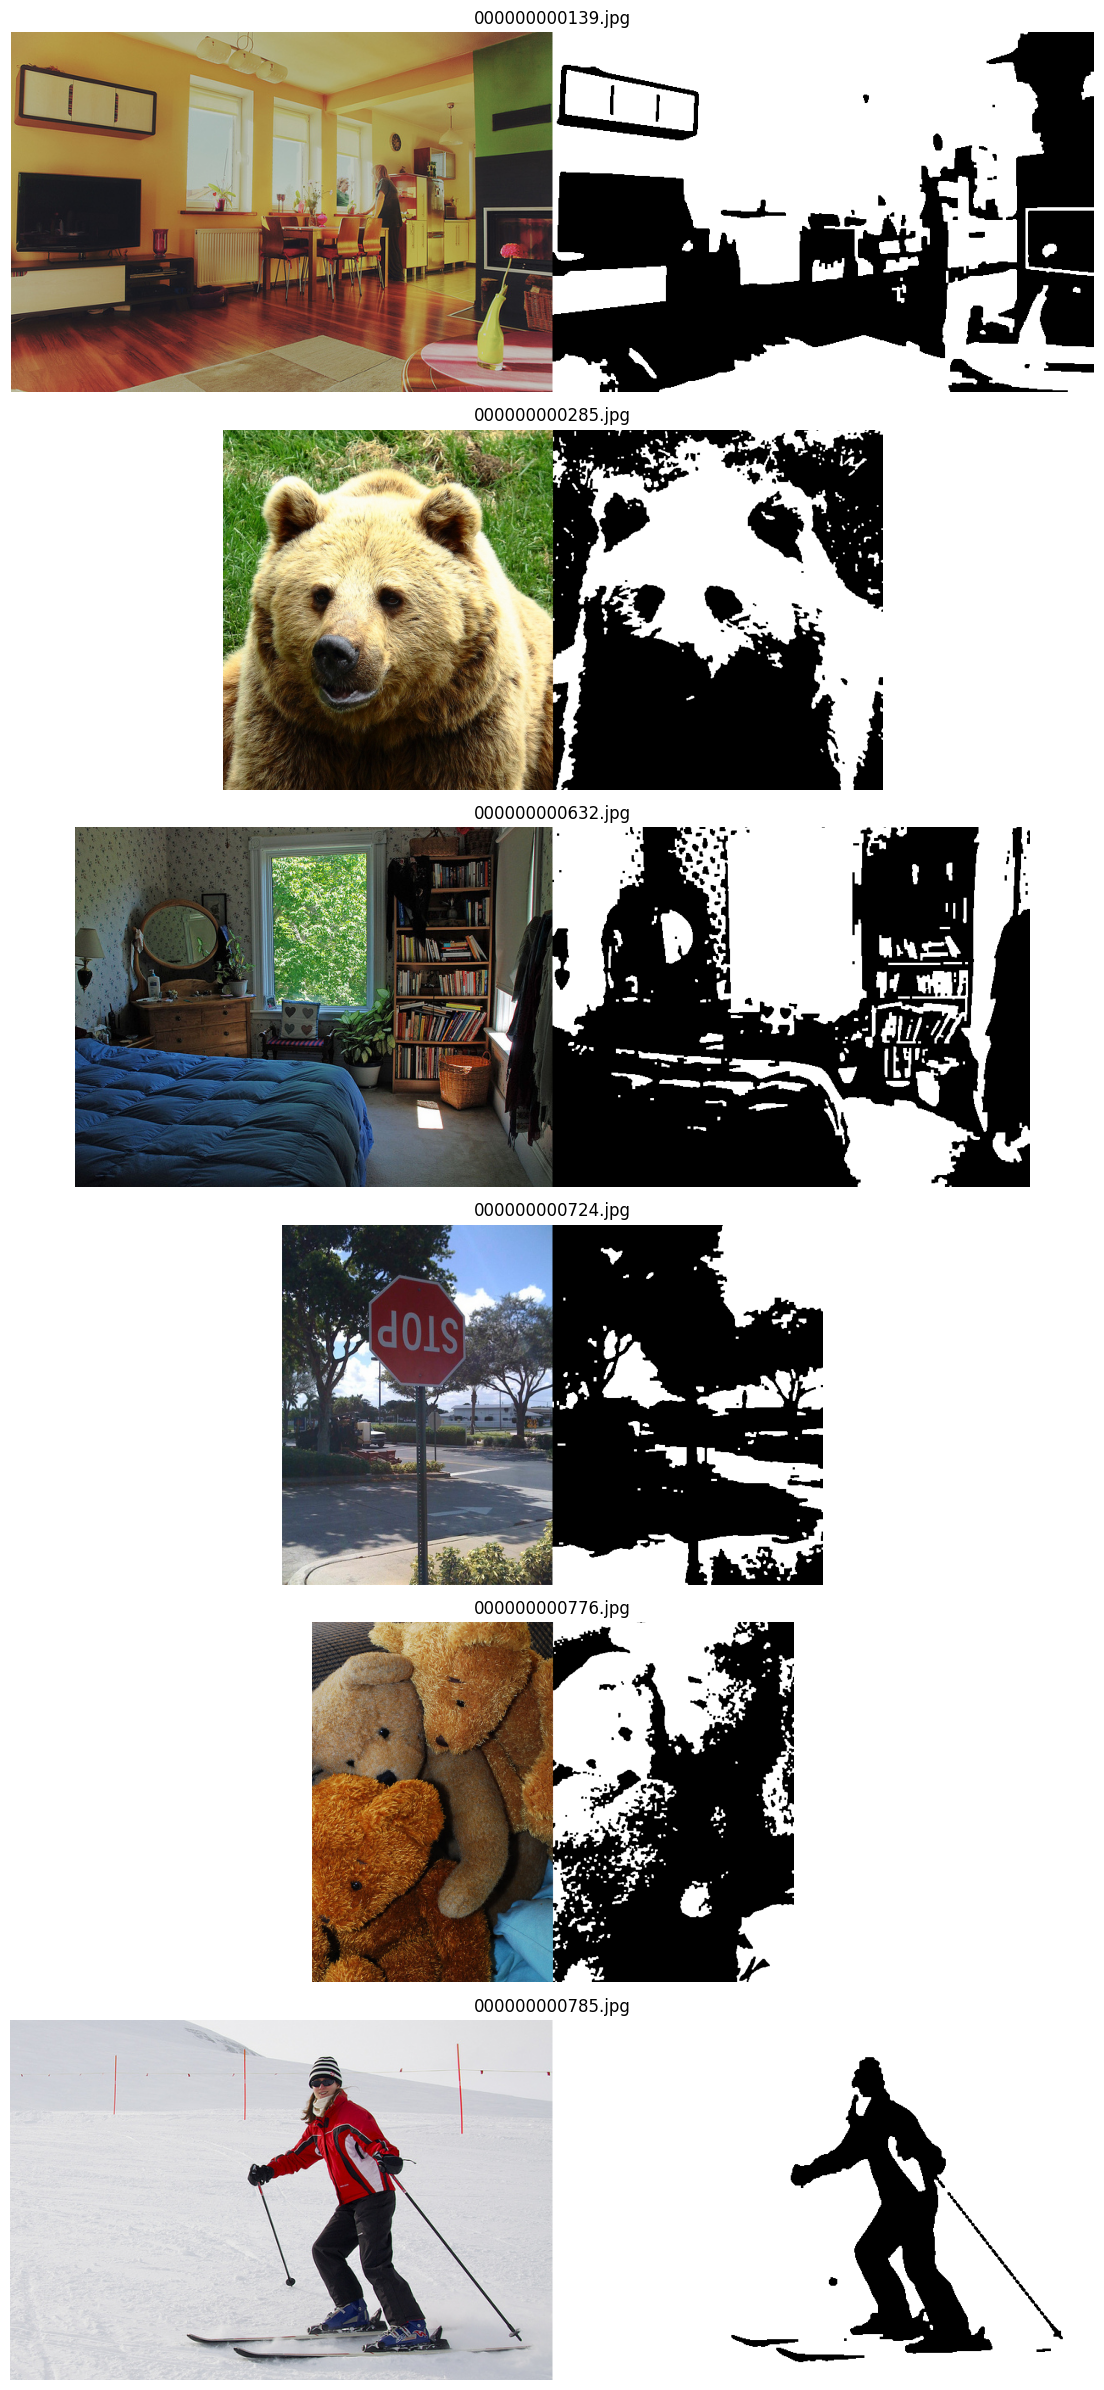

In [4]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

Dataset = '/kaggle/input/coco-2017-dataset/coco2017/val2017'
Imgs = 500
No_Img = 6

p = Path(Dataset)
paths = sorted(list(p.iterdir()))[:Imgs]

print(f'Found {len(paths)} files under: {Dataset}')
print(f'Processing {len(paths)} images...')

def make_mask(gray):
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    _, m = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    k = np.ones((3,3), np.uint8)
    m = cv2.morphologyEx(m, cv2.MORPH_OPEN, k, iterations=1)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, k, iterations=1)
    return m

previews = []
for i, fp in enumerate(paths):
    img = cv2.imread(str(fp), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = make_mask(gray)
    mask_bgr = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    side = np.concatenate((img, mask_bgr), axis=1)
    outp = fp.with_name(fp.stem + '_sidebyside.png')
    if len(previews) < No_Img:
        previews.append((fp.name, cv2.cvtColor(side, cv2.COLOR_BGR2RGB)))

if previews:
    n = len(previews)
    plt.figure(figsize=(12, 4*n))
    for idx, (name, im) in enumerate(previews):
        plt.subplot(n, 1, idx+1)
        plt.imshow(im)
        plt.title(name)
        plt.axis('off')
    plt.tight_layout()